In [3]:
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


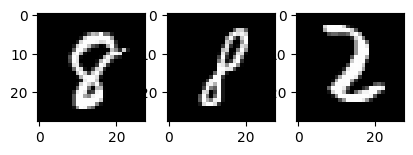

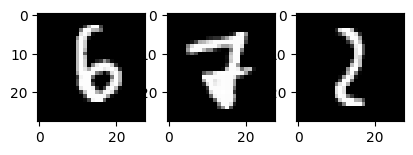

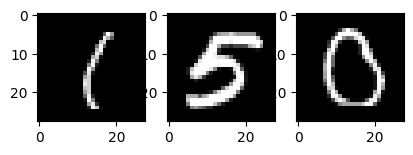

In [6]:
import matplotlib.pyplot as plt
import random
for i in range(1,4,1):
    for j in range(1,4,1):
        plt.subplot(i,4,j)
        plt.imshow(x_train[random.randint(0,60000)],cmap="gray")
    plt.show()

In [7]:
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(-1,28,28,1)/255.
x_test = x_test.reshape(-1,28,28,1)/255.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization,Conv2D

In [9]:
model = Sequential()
model.add(Conv2D(32,(2,2),activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(64,(2,2),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128,(2,2),2,activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(32,(2,2),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(64,(2,2),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128,(2,2),2,activation="relu"))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [10]:
model.compile(loss = "categorical_crossentropy",optimizer = "adam",metrics=["acc"])
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,batch_size=256)

Epoch 1/30
235/235 [==============================] - 124s 523ms/step - loss: 0.1333 - acc: 0.9591 - val_loss: 2.8817 - val_acc: 0.1157
Epoch 2/30
235/235 [==============================] - 106s 452ms/step - loss: 0.0323 - acc: 0.9897 - val_loss: 0.1000 - val_acc: 0.9745
Epoch 3/30
235/235 [==============================] - 124s 528ms/step - loss: 0.0194 - acc: 0.9934 - val_loss: 0.0466 - val_acc: 0.9857
Epoch 4/30
235/235 [==============================] - 133s 566ms/step - loss: 0.0115 - acc: 0.9963 - val_loss: 0.0477 - val_acc: 0.9872
Epoch 5/30
235/235 [==============================] - 129s 547ms/step - loss: 0.0106 - acc: 0.9967 - val_loss: 0.0374 - val_acc: 0.9903
Epoch 6/30
235/235 [==============================] - 113s 481ms/step - loss: 0.0086 - acc: 0.9971 - val_loss: 0.0534 - val_acc: 0.9861
Epoch 7/30
235/235 [==============================] - 112s 477ms/step - loss: 0.0122 - acc: 0.9960 - val_loss: 0.0563 - val_acc: 0.9883
Epoch 8/30
235/235 [============================

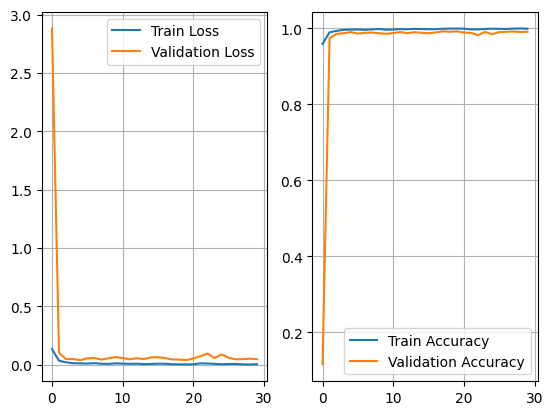

In [11]:
loss = history.history["loss"]
acc = history.history["acc"]
val_loss = history.history["val_loss"]
val_acc = history.history["val_acc"]
plt.subplot(1,2,1)
plt.plot(range(len(loss)),loss,label = "Train Loss")
plt.plot(range(len(val_loss)),val_loss,label = "Validation Loss")
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(len(acc)),acc,label = "Train Accuracy")
plt.plot(range(len(val_acc)),val_acc,label = "Validation Accuracy")
plt.grid()
plt.legend()
plt.show()

1/1 [==============================] - 0s 207ms/step
Actual : 0	Predict : 0


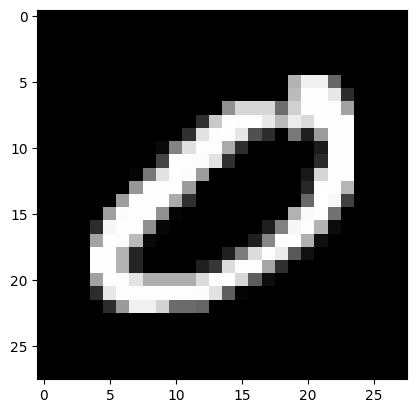

In [12]:
index =random.randint(0,9999)
plt.imshow(x_test[index],cmap="gray")
predict = model.predict(x_test[index].reshape(1,28,28,1))
print("Actual : {}\tPredict : {}".format(np.argmax(y_test[index]),np.argmax(predict)),)

In [13]:
wrong_index_list=[]
predict = model.predict(x_test)
for index in range(10000):
    if np.argmax(y_test[index]) != np.argmax(predict[index]):
        wrong_index_list.append(index)
print(wrong_index_list)
print("총 틀린 갯수 : ",len(wrong_index_list))

313/313 [==============================] - 4s 14ms/step
[62, 115, 321, 326, 445, 495, 582, 646, 659, 674, 839, 846, 882, 947, 1014, 1039, 1044, 1232, 1247, 1319, 1393, 1414, 1438, 1530, 1621, 1709, 1790, 1878, 1901, 2035, 2118, 2129, 2130, 2135, 2182, 2280, 2329, 2447, 2597, 2654, 2771, 2896, 2927, 2939, 2953, 3023, 3251, 3422, 3491, 3520, 3626, 3730, 3780, 3853, 3906, 3941, 4027, 4176, 4201, 4403, 4497, 4504, 4507, 4536, 4571, 4699, 4783, 4814, 4823, 4860, 5937, 5981, 5997, 6166, 6576, 6597, 6625, 6651, 6783, 8107, 8408, 8527, 9009, 9015, 9664, 9679, 9729, 9792, 9839, 9850]
총 틀린 갯수 :  90


Actual : 2	Predict : 0


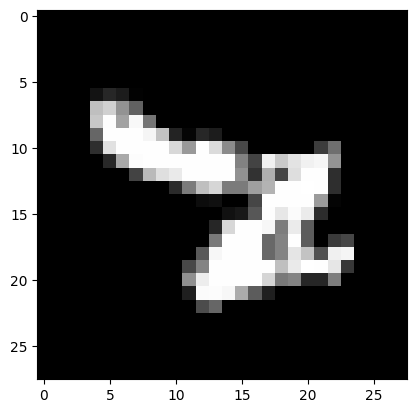

In [14]:
new_index = random.choice(wrong_index_list)
plt.imshow(x_test[new_index],cmap="gray")
print("Actual : {}\tPredict : {}".format(np.argmax(y_test[new_index]),np.argmax(new_index)),)